# Importing Data & libraries

In [1]:

import io
import time
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split  # Pour diviser nos données en trainset et testset. 
from sklearn.tree import DecisionTreeClassifier # Créer le modèle DecisionTreeClassifier 
from sklearn.metrics import accuracy_score # Calculer le score du modèle 
from sklearn import tree
import random
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

input_path = 'test_weather.csv'

data = (pd.read_csv(input_path).set_index('Unnamed: 0'))

y = data['bin']
#X = data.drop(['bin', 'side', ], axis=1)
X = data.copy()

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

#X = X.astype(float)
#y = y.astype(float)


# Exploring Data :




In [2]:

np.shape(data)

(239, 29)

In [3]:
data.isnull().sum()

Settlement Price    0
IA_TMIN_lag_72      0
IL_TMIN_lag_72      0
MN_TMIN_lag_72      0
IA_TMAX_lag_72      0
IL_TMAX_lag_72      0
MN_TMAX_lag_72      0
close               0
avg                 0
upper               0
lower               0
fracdiff            0
side                0
log_ret             0
mom_5               0
mom_13              0
mom_34              0
mom_55              0
vol_5               0
vol_13              0
vol_34              0
vol_55              0
autocorr_1          0
autocorr_2          0
autocorr_3          0
fast_mavg           0
slow_mavg           0
sma                 0
bin                 0
dtype: int64

In [4]:
data.head(5)

,Settlement Price,IA_TMIN_lag_72,IL_TMIN_lag_72,MN_TMIN_lag_72,IA_TMAX_lag_72,IL_TMAX_lag_72,MN_TMAX_lag_72,close,avg,upper,...,vol_13,vol_34,vol_55,autocorr_1,autocorr_2,autocorr_3,fast_mavg,slow_mavg,sma,bin
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1990-05-10,6.480,14.0,24.0,13.0,43.0,53.0,27.0,6.480,6.052316,6.441037,...,0.013596,0.000000,0.000000,0.000000,0.000000,0.000000,6.368714,6.265067,1.0,0
1990-08-24,6.300,52.0,53.0,51.0,74.0,71.0,67.0,6.300,6.054840,6.280678,...,0.008732,0.010144,0.012568,0.120997,-0.111511,0.151847,6.175143,6.093000,1.0,0
1990-10-09,6.343,71.0,65.0,63.0,90.0,92.0,88.0,6.343,6.140859,6.322549,...,0.012440,0.011780,0.011029,-0.108744,-0.032661,-0.233463,6.191143,6.172267,1.0,1
1990-10-29,5.905,70.0,64.0,52.0,83.0,92.0,91.0,5.905,6.122027,6.290542,...,0.006922,0.010481,0.010492,-0.021537,-0.066654,-0.387641,6.054857,6.125200,-1.0,0
1990-11-06,5.758,68.0,58.0,66.0,80.0,88.0,73.0,5.758,6.069583,6.288940,...,0.008107,0.010189,0.010647,-0.010282,-0.074239,-0.324258,5.883571,5.994067,-1.0,0


In [5]:
data.isnull().sum()

Settlement Price    0
IA_TMIN_lag_72      0
IL_TMIN_lag_72      0
MN_TMIN_lag_72      0
IA_TMAX_lag_72      0
IL_TMAX_lag_72      0
MN_TMAX_lag_72      0
close               0
avg                 0
upper               0
lower               0
fracdiff            0
side                0
log_ret             0
mom_5               0
mom_13              0
mom_34              0
mom_55              0
vol_5               0
vol_13              0
vol_34              0
vol_55              0
autocorr_1          0
autocorr_2          0
autocorr_3          0
fast_mavg           0
slow_mavg           0
sma                 0
bin                 0
dtype: int64

#Removing the null values

1886.6272821760886


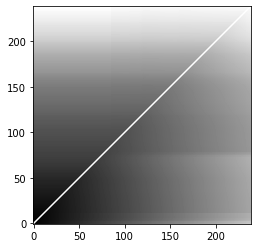

In [13]:
import numpy as np

# We define two sequences x, y as numpy array
# where y is actually a sub-sequence from x
y = data['close']
x = data['fracdiff']

from dtw import dtw

manhattan_distance = lambda x, y: np.abs(x - y)

d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=manhattan_distance)

print(d)
#>>> 2.0 # Only the cost for the insertions is kept

# You can also visualise the accumulated cost and the shortest path
import matplotlib.pyplot as plt

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

In [11]:
##Y = data['Last']
#X = data.astype(float)

#Y = data[['Regime_Flat', 'Regime_Up']].idxmax(axis=1)

#X = X.drop(['open', 'high', 'low', 'close', 'avg', 'upper',
#            'lower','Unnamed: 0.1.1', 'Unnamed: 0', 'volume', 'fast_mavg','slow_mavg','sma', 'MSD_27'
#           , 'rsi_5', 'kca_std_1', 'kca_mean_1','MSD_15','MSD_21', 'cum_dollar', 'autocorr_2', 'mom_55',
#           'vol_55', 'MFI_18','MFI_10','EFI_10', 'CHAIKIN_15_50','CHAIKIN_16_64','MFI_12','vol_13','MSD_24','MFI_16'
#           ,'EFI_20'], axis=1)

X = X.drop(['bin','side','close','avg','upper','lower'], axis=1)
X.fillna(0, inplace=True)
X.to_csv ('model_data.csv', index = 'Unnamed: 0.1', header=True)

#Y.fillna(0, inplace=True)


#Y = Y.astype(float)
X.head()

,Settlement Price,IA_TMIN_lag_72,IL_TMIN_lag_72,MN_TMIN_lag_72,IA_TMAX_lag_72,IL_TMAX_lag_72,MN_TMAX_lag_72,fracdiff,log_ret,mom_5,...,vol_5,vol_13,vol_34,vol_55,autocorr_1,autocorr_2,autocorr_3,fast_mavg,slow_mavg,sma
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1990-05-10,6.480,14.0,24.0,13.0,43.0,53.0,27.0,0.0,0.001854,0.028898,...,0.012319,0.013596,0.000000,0.000000,0.000000,0.000000,0.000000,6.368714,6.265067,1.0
1990-08-24,6.300,52.0,53.0,51.0,74.0,71.0,67.0,0.0,0.003180,0.024390,...,0.010095,0.008732,0.010144,0.012568,0.120997,-0.111511,0.151847,6.175143,6.093000,1.0
1990-10-09,6.343,71.0,65.0,63.0,90.0,92.0,88.0,0.0,0.000473,0.046182,...,0.014540,0.012440,0.011780,0.011029,-0.108744,-0.032661,-0.233463,6.191143,6.172267,1.0
1990-10-29,5.905,70.0,64.0,52.0,83.0,92.0,91.0,0.0,-0.007256,-0.033235,...,0.008528,0.006922,0.010481,0.010492,-0.021537,-0.066654,-0.387641,6.054857,6.125200,-1.0
1990-11-06,5.758,68.0,58.0,66.0,80.0,88.0,73.0,0.0,-0.009851,-0.024894,...,0.009942,0.008107,0.010189,0.010647,-0.010282,-0.074239,-0.324258,5.883571,5.994067,-1.0


#Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
#Deviser X et Y

df1 = X.copy()
df1_names=df1 .columns

# Diviser les données en données d'entrainement et données de tests (Fait dans le TP02 )
## Décider de la taille des données pour chaque set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

print(X_train.shape)
print(X_test.shape)

# Créer le modèle 
model = LogisticRegression(solver="lbfgs")

# Entraîner le modèle 
model.fit(X_train, y_train)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
accuracy = accuracy_score(y_test,predicted_classes)

print(accuracy)
#df1_names

(215, 23)
(24, 23)
0.7083333333333334


/Users/yiluntong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(208, 15)
(24, 15)
accuracy :0.9166666666666666

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


#Fischer Score: Chi Square
#In this notebook, we'll compute the chi-squared stats between each non negative feature and the target class(Class Name).
#This score should be used to evaluate categorical variables in a classification task
# Calcualte the Fisher Score (chi2) between each feature and target
start = time.time()
fisher_score = chi2(X_train, y_train)
end = time.time()
print("Taken Time :")
print(end - start)

#Two arrays are returned: F scores and P value. More the P value, more difference between the distributions.
p_values = pd.Series(fisher_score[1])
p_values.index = df1_names
p_values.sort_values(ascending=False)
p_values




ValueError: Input X must be non-negative.

In [14]:
fisher_score

NameError: name 'fisher_score' is not defined

In [15]:
#Smaller the p_value, more significant the feature is to predict the target value,so we choose features that maximize the lower bound of traditional Fisher score
#Deviser les nouveaux X et Y
from sklearn.ensemble import RandomForestRegressor

df2 = X.copy()

#calculer la nouvelle accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

print(X_train.shape)
print(X_test.shape)

# Créer le modèle 
model = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)

# Entraîner le modèle 
model.fit(X_train, y_train)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
#accuracy = accuracy_score(y_test,predicted_classes)

#print(accuracy)

(215, 23)
(24, 23)


In [16]:

X.head()

,Settlement Price,IA_TMIN_lag_72,IL_TMIN_lag_72,MN_TMIN_lag_72,IA_TMAX_lag_72,IL_TMAX_lag_72,MN_TMAX_lag_72,fracdiff,log_ret,mom_5,...,vol_5,vol_13,vol_34,vol_55,autocorr_1,autocorr_2,autocorr_3,fast_mavg,slow_mavg,sma
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1990-05-10,6.480,14.0,24.0,13.0,43.0,53.0,27.0,0.0,0.001854,0.028898,...,0.012319,0.013596,0.000000,0.000000,0.000000,0.000000,0.000000,6.368714,6.265067,1.0
1990-08-24,6.300,52.0,53.0,51.0,74.0,71.0,67.0,0.0,0.003180,0.024390,...,0.010095,0.008732,0.010144,0.012568,0.120997,-0.111511,0.151847,6.175143,6.093000,1.0
1990-10-09,6.343,71.0,65.0,63.0,90.0,92.0,88.0,0.0,0.000473,0.046182,...,0.014540,0.012440,0.011780,0.011029,-0.108744,-0.032661,-0.233463,6.191143,6.172267,1.0
1990-10-29,5.905,70.0,64.0,52.0,83.0,92.0,91.0,0.0,-0.007256,-0.033235,...,0.008528,0.006922,0.010481,0.010492,-0.021537,-0.066654,-0.387641,6.054857,6.125200,-1.0
1990-11-06,5.758,68.0,58.0,66.0,80.0,88.0,73.0,0.0,-0.009851,-0.024894,...,0.009942,0.008107,0.010189,0.010647,-0.010282,-0.074239,-0.324258,5.883571,5.994067,-1.0


Taken Time :
0.18152594566345215
Selected top 6 features: Index(['IA_TMAX_lag_72', 'mom_5', 'mom_13', 'vol_13', 'vol_34', 'vol_55',
       'autocorr_1', 'sma'],
      dtype='object')


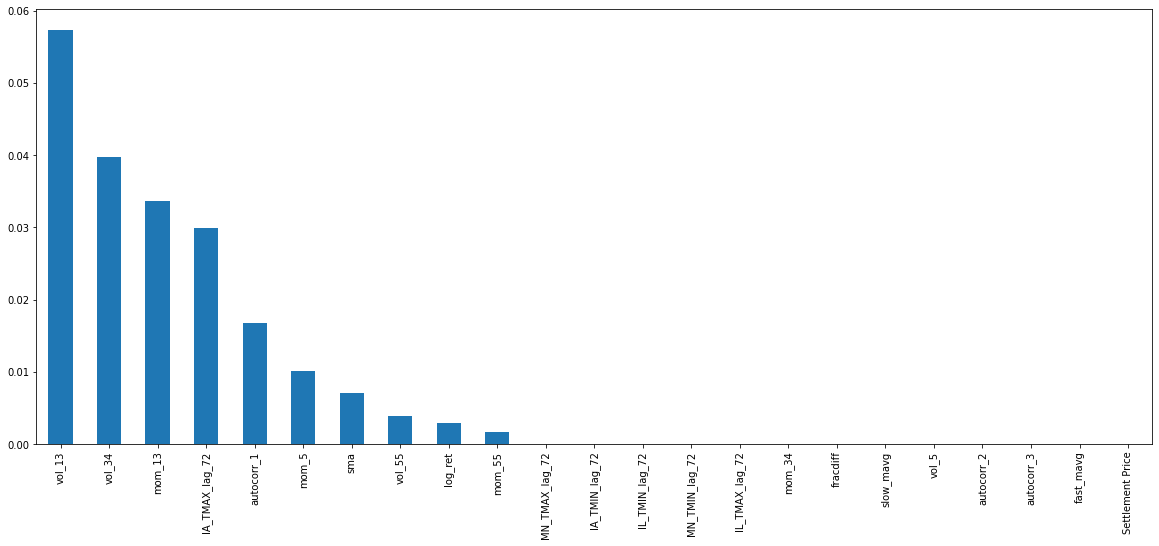

In [17]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 
# Calculate Mutual Information between each feature and the target
start = time.time()
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)
# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=8).fit(X_train, y_train)
end = time.time()
print("Taken Time :")
print(end - start)
print('Selected top 6 features: {}'.format(X_train.columns[k_best_features.get_support()]))
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))


As we can see in the plot from left to right, the features which have the most amount of mutual information is on the left and the features with the least amount of mutual information are on the right. Some of the features contribute a lot to the mutual information whereas some of them do not contribute anything. So, to select the important features from this list, we can set a threshold like maybe select the first 2 percentile of features or first 5 features etc.

To do this we used a combination of "SelectKbest" or "SelectPercentile".

In [18]:
#Deviser les nouveaux X et Y

#df3 = X.copy()
#X = df3.values[:, 1:6]
#Y = df3.values[:, 0]
#calculer la nouvelle accuracy
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

print(X_train.shape)
print(X_test.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
#X.hist()

# Créer le modèle 
model = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)

# Entraîner le modèle 
model.fit(X_train, y_train)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
#accuracy = accuracy_score(y_test,predicted_classes)

print(accuracy)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(model.score(X_train, y_train), 
                                                                                    model.oob_score_,
                                                                                    model.score(X_test, y_test)))


(215, 23)
(24, 23)
0.7083333333333334
R^2 Training Score: 0.85 
OOB Score: -0.01 
R^2 Validation Score: -0.12


In [19]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_train, y_train, n_repeats=10,
                                random_state=0)
print('Permutation importance scores', result.importances)



Permutation importance scores [[0.07037724 0.07065119 0.06631619 0.06491853 0.06830232 0.07703575
  0.05984792 0.05889671 0.06256967 0.07054466]
 [0.03631866 0.04098342 0.04671862 0.03499965 0.04471726 0.03474092
  0.03679047 0.0403163  0.0456634  0.03743222]
 [0.09063686 0.08527961 0.0953143  0.07931613 0.08381094 0.09067998
  0.09003569 0.08953852 0.09113656 0.09822629]
 [0.06698331 0.06465727 0.05830822 0.05591623 0.05932285 0.05828032
  0.05142903 0.06251133 0.06570995 0.06695794]
 [0.07041529 0.06991559 0.07310406 0.05371195 0.06261025 0.0697152
  0.0551299  0.06541063 0.05822705 0.0691952 ]
 [0.07613526 0.07200826 0.06510117 0.05036367 0.06934993 0.07252826
  0.07097841 0.06682857 0.07679477 0.07062836]
 [0.02692827 0.02300672 0.02789217 0.02198449 0.02312087 0.01939464
  0.02450077 0.02383618 0.02609374 0.02316399]
 [0.03468004 0.03001528 0.02978445 0.03688432 0.03547652 0.03309975
  0.03701622 0.03169449 0.03368063 0.03732822]
 [0.06572009 0.07971691 0.07644219 0.08620546 0.081

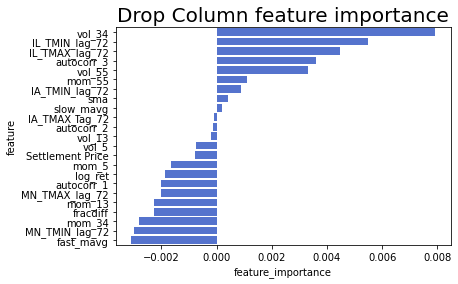

In [20]:
from sklearn.base import clone 

def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
    'feature_importance': importances}).sort_values('feature_importance', ascending = False).reset_index(drop = True)
    return df

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

Z_df = drop_col_feat_imp(model,X_train,y_train)

var_imp_plot(Z_df, 'Drop Column feature importance')

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


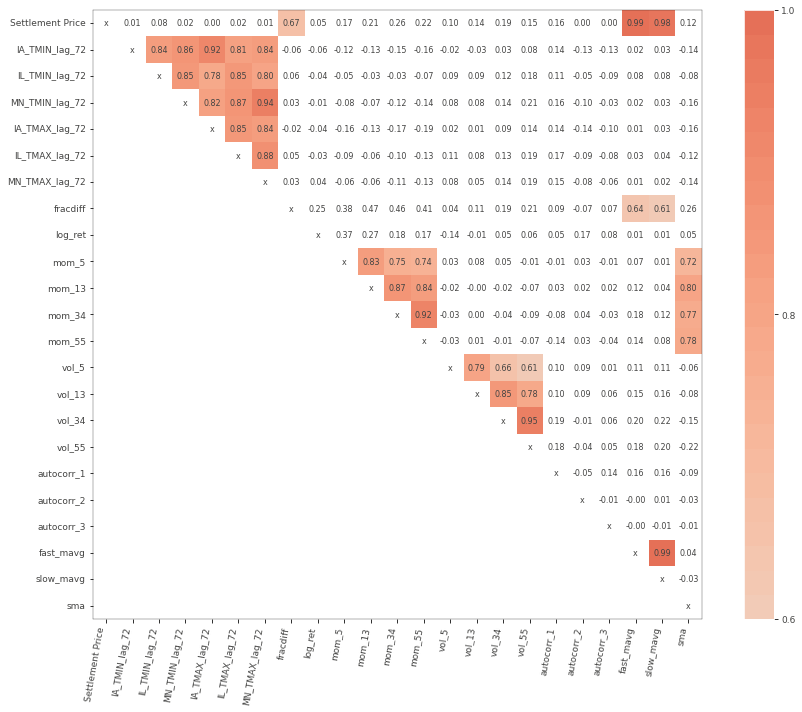

TypeError: _generate_unsampled_indices() missing 1 required positional argument: 'n_samples_bootstrap'

In [21]:
from rfpimp import *
# Calculate permutation and dropcolumn importances

viz = plot_corr_heatmap(X_train, figsize=(15,10))
viz.view()

perm_imp = permutation_importances(model, X_train, y_train, oob_classifier_accuracy, n_samples=100)
drop_imp = dropcol_importances(model, X_train, y_train, X_test, y_test)
print("Trained on {} rows with {} accuracy, {} oob score".format(data.shape[0], accuracy, clf.oob_score_))

In [22]:
import matplotlib.pyplot as plt
# Create charts based on results
perm_imp.sort_values(by=['Importance'], ascending=True).plot(kind='barh').set(xlabel="Permutation Importance Score")
drop_imp.sort_values(by=['Importance'], ascending=True).plot(kind='barh').set(xlabel="Drop Column Importance Score")
plt.show()

NameError: name 'perm_imp' is not defined

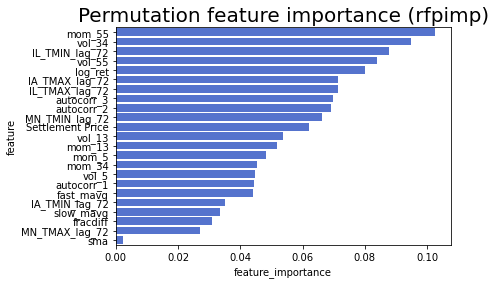

In [23]:
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(model, X_train, y_train, r2)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)
var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
perm_imp_eli5 = imp_df(X_train.columns, perm.feature_importances_)
var_imp_plot(perm_imp_eli5, 'Permutation feature importance (eli5)')

eli5.show_weights(perm)

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/yiluntong/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/yiluntong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubd

Weight,Feature
0.1117 ± 0.0241,x15
0.0999 ± 0.0132,x12
0.0949 ± 0.0219,x16
0.0884 ± 0.0178,x2
0.0805 ± 0.0142,x8
0.0733 ± 0.0144,x18
0.0691 ± 0.0132,x5
0.0688 ± 0.0114,x4
0.0675 ± 0.0119,x19
0.0666 ± 0.0081,x0


In [97]:
pred_diff = pd.DataFrame({'difference': abs(y_train - model.predict(X_train))})

print('Index with smallest error:', pred_diff.sort_values('difference').head(1).index.values[0])
print('Index with largest error:', pred_diff.sort_values('difference', ascending = False).head(1).index.values[0])

Index with smallest error: 2018-08-23 09:33:36.566149
Index with largest error: 2018-04-25 09:59:45.378174


In [98]:
from treeinterpreter import treeinterpreter as ti, utils

selected_rows = [31, 85]
selected_df = X_train.iloc[selected_rows,:].values
prediction, bias, contributions = ti.predict(model, selected_df)

In [99]:
for i in range(len(selected_rows)):
    print("Row", selected_rows[i])
    print("Prediction:", prediction[i][0], 'Actual Value:', y_train[selected_rows[i]])
    print("Bias (trainset mean)", bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], 
                                 X_train.columns), 
                             key=lambda x: -abs(x[0])):
        print(feature, round(c, 2))
    print("-"*20) 

Row 31
Prediction: 0.18 Actual Value: 0.0
Bias (trainset mean) 0.2591715976331361
Feature contributions:
log_ret -0.07
vol_5 -0.05
kca_mean_2 -0.05
autocorr_1 0.04
kca_mean_3 0.03
MFI_14 0.03
kca_std_3 -0.02
CHAIKIN_8_20 0.02
cum_ticks -0.02
autocorr_3 -0.02
rsi_34 0.02
cum_vol -0.01
CHAIKIN_3_10 -0.01
mom_34 0.01
rsi_13 0.01
mom_13 -0.01
EFI_16 0.01
CHAIKIN_32_128 0.01
vol_34 0.0
EFI_7 0.0
EFI_13 0.0
rsi_55 0.0
kca_std_2 -0.0
MSD_18 -0.0
mom_5 0.0
fracdiff 0.0
--------------------
Row 85
Prediction: 0.02 Actual Value: 0.0
Bias (trainset mean) 0.2591715976331361
Feature contributions:
kca_mean_2 -0.05
MFI_14 -0.03
autocorr_1 -0.02
MSD_18 -0.02
cum_ticks -0.01
vol_5 0.01
fracdiff -0.01
cum_vol -0.01
log_ret -0.01
mom_34 -0.01
rsi_13 -0.01
vol_34 -0.01
mom_13 -0.01
kca_mean_3 -0.01
rsi_34 -0.01
EFI_13 -0.01
rsi_55 -0.01
mom_5 -0.01
CHAIKIN_8_20 -0.01
kca_std_3 -0.01
autocorr_3 0.01
CHAIKIN_3_10 0.0
CHAIKIN_32_128 0.0
EFI_7 -0.0
EFI_16 -0.0
kca_std_2 -0.0
--------------------


In [100]:
prediction1, bias1, contributions1 = ti.predict(model, np.array([selected_df[0]]), joint_contribution=True)
prediction2, bias2, contributions2 = ti.predict(model, np.array([selected_df[1]]), joint_contribution=True)

In [101]:
aggregated_contributions1 = utils.aggregated_contribution(contributions1)
aggregated_contributions2 = utils.aggregated_contribution(contributions2)

In [102]:
res = []
for k in set(aggregated_contributions1.keys()).union(
              set(aggregated_contributions2.keys())):
    res.append(([X_train.columns[index] for index in k] , 
               aggregated_contributions1.get(k, 0) - aggregated_contributions2.get(k, 0)))   
         
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

['CHAIKIN_8_20', 'CHAIKIN_32_128'] [0.01520213]
['MFI_14'] [0.01260472]
['mom_13'] [0.00959717]
['CHAIKIN_8_20', 'CHAIKIN_32_128', 'log_ret', 'kca_std_2'] [-0.00930233]
['cum_vol', 'log_ret', 'vol_5', 'autocorr_1', 'autocorr_3', 'kca_std_3'] [-0.00869565]
['cum_vol', 'CHAIKIN_8_20', 'MFI_14', 'log_ret', 'kca_mean_3'] [0.00866667]
['MFI_14', 'mom_13', 'autocorr_1', 'autocorr_3'] [-0.00866667]
['rsi_13'] [0.00840785]
['cum_vol', 'MFI_14', 'rsi_34', 'kca_mean_2'] [-0.00833333]
['autocorr_1', 'kca_mean_2', 'kca_std_2'] [-0.00826087]


In [103]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode = 'regression',
                                                   feature_names = X_train.columns,
                                                   categorical_features=[3], 
                                                   categorical_names=['CHAS'], 
                                                   discretize_continuous = True)

In [104]:
np.random.seed(42)
exp = explainer.explain_instance(X_train.values[31], model.predict)
exp.show_in_notebook(show_all=False) #only the features used in the explanation are displayed

np.random.seed(42)
exp = explainer.explain_instance(X_train.values[85], model.predict)
exp.show_in_notebook(show_all=False)

In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.initjs()
i=200
shap.force_plot(explainer.expected_value, shap_values[i,:], X.iloc[i,:])